#Diabetes Prediction By using
**#DecisionTree Regression **

In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

In [9]:
di_data = load_diabetes()


In [13]:
X = pd.DataFrame(di_data['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [14]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
y = di_data['target']
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [18]:
X_train.shape,X_test.shape

((353, 10), (89, 10))

In [20]:
#correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.196083,0.202593,0.367479,0.238894,0.194840,-0.119524,0.228041,0.302274,0.345631
sex,0.196083,1.000000,0.088119,0.229459,0.010085,0.117818,-0.370008,0.301513,0.147678,0.213834
bmi,0.202593,0.088119,1.000000,0.378013,0.217977,0.238805,-0.391322,0.411254,0.432327,0.374699
bp,0.367479,0.229459,0.378013,1.000000,0.224559,0.159546,-0.193113,0.244140,0.399925,0.376167
s1,0.238894,0.010085,0.217977,0.224559,1.000000,0.880910,0.018819,0.548260,0.544285,0.309938
s2,0.194840,0.117818,0.238805,0.159546,0.880910,1.000000,-0.240253,0.661777,0.321811,0.278650
s3,-0.119524,-0.370008,-0.391322,-0.193113,0.018819,-0.240253,1.000000,-0.752319,-0.395944,-0.316024
s4,0.228041,0.301513,0.411254,0.244140,0.548260,0.661777,-0.752319,1.000000,0.624991,0.440174
s5,0.302274,0.147678,0.432327,0.399925,0.544285,0.321811,-0.395944,0.624991,1.000000,0.472258
s6,0.345631,0.213834,0.374699,0.376167,0.309938,0.278650,-0.316024,0.440174,0.472258,1.000000


<Axes: >

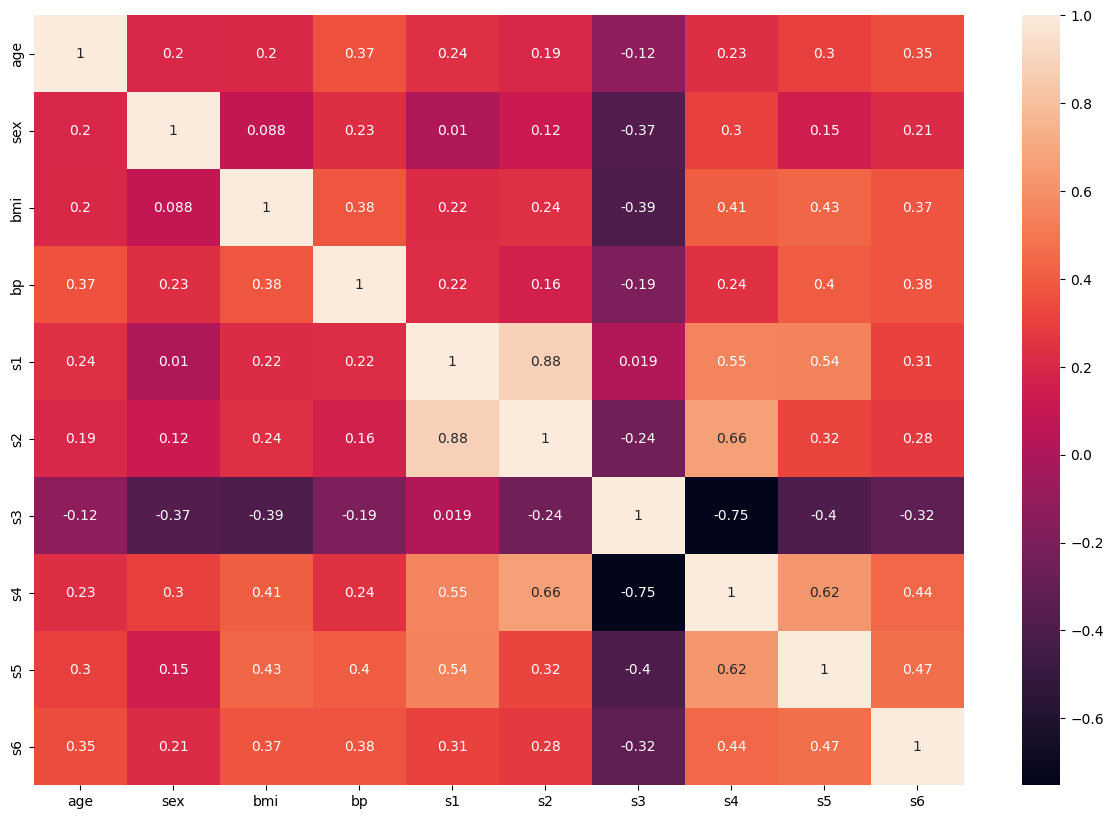

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [19]:
#apply DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [23]:
reg = DecisionTreeRegressor()

In [25]:
reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [26]:
y_pred  = reg.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.02247191011235955
              precision    recall  f1-score   support

        31.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         0
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         1
        48.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        55.0       0.50      1.00      0.67         1
        59.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         0
        63.0       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

#HyperParameter Tuning

In [29]:
param = {

         'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
         'splitter':['best', 'random'],
         'max_depth':[1,2,3,4,5,10,15,20,25],
         'max_features': ['auto','sqrt','log2']

}

In [30]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
reg1 = DecisionTreeRegressor()

In [36]:
grid = GridSearchCV(reg1,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [38]:
import warnings as wr
wr.filterwarnings('ignore')
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [39]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [40]:
grid.best_score_

-3698.0400482002055

In [42]:
y_pred1 = grid.predict(X_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
re = DecisionTreeRegressor(criterion='squared_error',max_depth=4,max_features='sqrt',splitter='random')

In [50]:
re.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=4, max_features='sqrt', splitter='random')

In [52]:
y_pre = re.predict(X_test)
y_pre

array([108.67326733, 236.82926829, 151.03921569, 124.57894737,
       151.03921569, 193.66666667, 124.57894737, 236.82926829,
       108.67326733, 108.67326733, 108.67326733, 151.03921569,
       193.66666667, 108.67326733, 108.67326733, 141.        ,
       151.03921569, 108.67326733, 181.44444444, 108.67326733,
       124.57894737, 174.        , 108.67326733, 236.82926829,
       108.67326733, 124.57894737, 124.57894737, 137.        ,
       193.66666667, 108.67326733, 229.        , 141.        ,
       124.57894737, 124.57894737, 193.66666667, 151.03921569,
       108.67326733, 141.        , 236.82926829, 124.57894737,
       229.        , 108.67326733, 236.82926829, 151.03921569,
       108.67326733, 108.67326733, 108.67326733, 108.67326733,
       236.82926829, 108.67326733, 124.57894737, 108.67326733,
       108.67326733, 174.        , 236.82926829, 124.57894737,
       108.67326733, 151.03921569, 193.66666667, 151.03921569,
       151.03921569, 124.57894737, 108.67326733, 108.67

[Text(0.5, 0.9, 'x[7] <= 0.097\nsquared_error = 5845.82\nsamples = 353\nvalue = 152.918'),
 Text(0.25, 0.7, 'x[2] <= 0.041\nsquared_error = 5591.963\nsamples = 338\nvalue = 149.169'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= -0.006\nsquared_error = 4496.23\nsamples = 273\nvalue = 135.026'),
 Text(0.0625, 0.3, 'x[5] <= -0.007\nsquared_error = 3178.917\nsamples = 177\nvalue = 115.503'),
 Text(0.03125, 0.1, 'squared_error = 2875.586\nsamples = 101\nvalue = 108.673'),
 Text(0.09375, 0.1, 'squared_error = 3437.665\nsamples = 76\nvalue = 124.579'),
 Text(0.1875, 0.3, 'x[2] <= 0.016\nsquared_error = 4926.645\nsamples = 96\nvalue = 171.021'),
 Text(0.15625, 0.1, 'squared_error = 4810.155\nsamples = 51\nvalue = 151.039'),
 Text(0.21875, 0.1, 'squared_error = 4093.333\nsamples = 45\nvalue = 193.667'),
 Text(0.375, 0.5, 'x[8] <= 0.002\nsquared_error = 5825.507\nsamples = 65\nvalue = 208.569'),
 Text(0.3125, 0.3, 'x[6] <= -0.012\nsquared_error = 5134.984\nsamples = 21\nvalue = 158.3

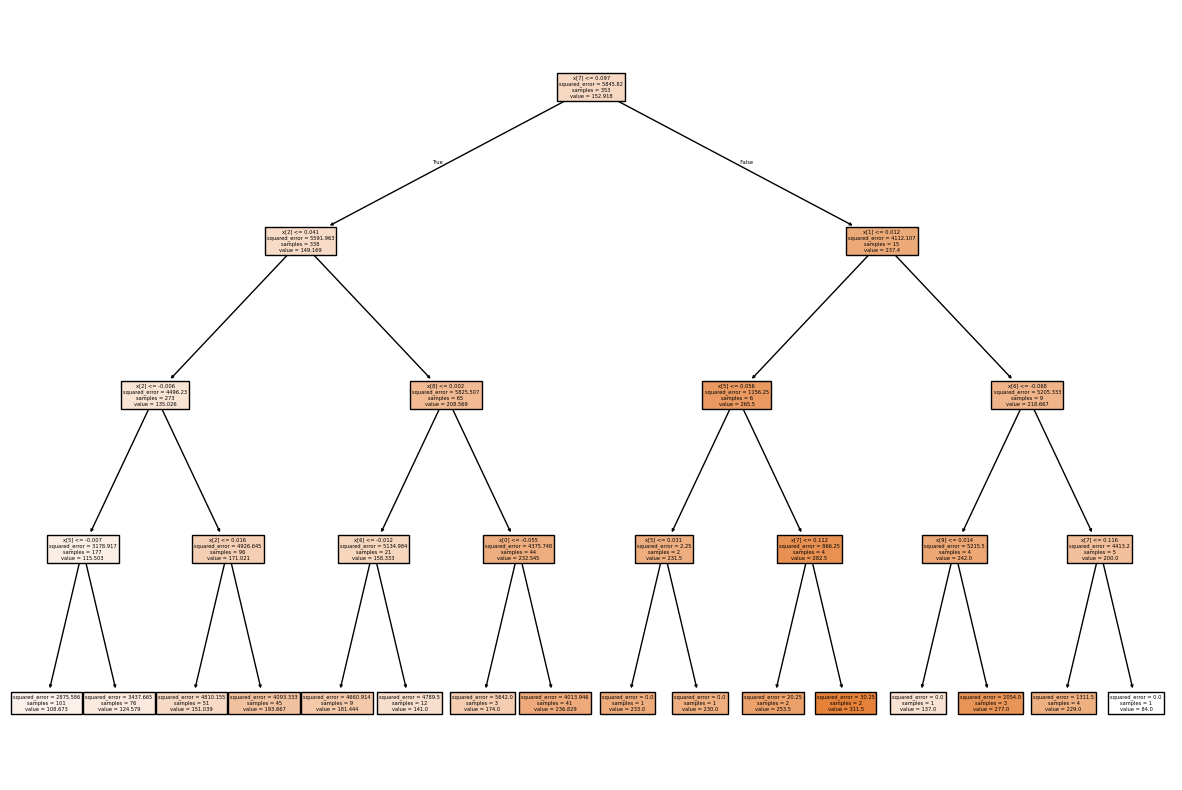

In [54]:
#visulazie DT
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(re,filled=True)